# Itemsets and Association Rules

In [1]:
import numpy as np
from itertools import combinations
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# list of all items
items = ['apple', 'bread', 'cheese', 'milk', 'eggs' ]

### Itemsets

For $r$ items the the total number of itemsets = $2^{r}-1$

In [3]:
# Generate itemsets of different lengths
count = 0
itemsets = []
for r in range(1, len(items)+1):
    itemsets.extend(combinations(items, r))

# Print the generated itemsets
for itemset in itemsets:
    count += 1
    print(count,"- C",len(itemset),"-",itemset)

1 - C 1 - ('apple',)
2 - C 1 - ('bread',)
3 - C 1 - ('cheese',)
4 - C 1 - ('milk',)
5 - C 1 - ('eggs',)
6 - C 2 - ('apple', 'bread')
7 - C 2 - ('apple', 'cheese')
8 - C 2 - ('apple', 'milk')
9 - C 2 - ('apple', 'eggs')
10 - C 2 - ('bread', 'cheese')
11 - C 2 - ('bread', 'milk')
12 - C 2 - ('bread', 'eggs')
13 - C 2 - ('cheese', 'milk')
14 - C 2 - ('cheese', 'eggs')
15 - C 2 - ('milk', 'eggs')
16 - C 3 - ('apple', 'bread', 'cheese')
17 - C 3 - ('apple', 'bread', 'milk')
18 - C 3 - ('apple', 'bread', 'eggs')
19 - C 3 - ('apple', 'cheese', 'milk')
20 - C 3 - ('apple', 'cheese', 'eggs')
21 - C 3 - ('apple', 'milk', 'eggs')
22 - C 3 - ('bread', 'cheese', 'milk')
23 - C 3 - ('bread', 'cheese', 'eggs')
24 - C 3 - ('bread', 'milk', 'eggs')
25 - C 3 - ('cheese', 'milk', 'eggs')
26 - C 4 - ('apple', 'bread', 'cheese', 'milk')
27 - C 4 - ('apple', 'bread', 'cheese', 'eggs')
28 - C 4 - ('apple', 'bread', 'milk', 'eggs')
29 - C 4 - ('apple', 'cheese', 'milk', 'eggs')
30 - C 4 - ('bread', 'cheese', 

### Association Rules

For $r$ items the the total number of association rules = 

$$\sum_{k=1}^{r-1}\left[\binom{r}{k} \times \sum_{j=1}^{r-k}\binom{r-k}{j}\right] = 3^r - 2^{r+1}+1$$

In [4]:
from itertools import combinations

def generate_association_rules(itemset):
    rules = []
    n = len(itemset)
    for r in range(1, n):  # Consider subsets of all lengths from 1 to n-1
        for antecedent in combinations(itemset, r):
            consequent = tuple(item for item in itemset if item not in antecedent)
            rules.append((set(antecedent), set(consequent)))
    return rules

# Example usage
count = 0
for itemset in itemsets:
    association_rules = generate_association_rules(itemset)
    for rule in association_rules:
        count += 1
        print(count,rule)

1 ({'apple'}, {'bread'})
2 ({'bread'}, {'apple'})
3 ({'apple'}, {'cheese'})
4 ({'cheese'}, {'apple'})
5 ({'apple'}, {'milk'})
6 ({'milk'}, {'apple'})
7 ({'apple'}, {'eggs'})
8 ({'eggs'}, {'apple'})
9 ({'bread'}, {'cheese'})
10 ({'cheese'}, {'bread'})
11 ({'bread'}, {'milk'})
12 ({'milk'}, {'bread'})
13 ({'bread'}, {'eggs'})
14 ({'eggs'}, {'bread'})
15 ({'cheese'}, {'milk'})
16 ({'milk'}, {'cheese'})
17 ({'cheese'}, {'eggs'})
18 ({'eggs'}, {'cheese'})
19 ({'milk'}, {'eggs'})
20 ({'eggs'}, {'milk'})
21 ({'apple'}, {'cheese', 'bread'})
22 ({'bread'}, {'apple', 'cheese'})
23 ({'cheese'}, {'apple', 'bread'})
24 ({'apple', 'bread'}, {'cheese'})
25 ({'apple', 'cheese'}, {'bread'})
26 ({'cheese', 'bread'}, {'apple'})
27 ({'apple'}, {'milk', 'bread'})
28 ({'bread'}, {'milk', 'apple'})
29 ({'milk'}, {'apple', 'bread'})
30 ({'apple', 'bread'}, {'milk'})
31 ({'milk', 'apple'}, {'bread'})
32 ({'milk', 'bread'}, {'apple'})
33 ({'apple'}, {'eggs', 'bread'})
34 ({'bread'}, {'eggs', 'apple'})
35 ({'egg

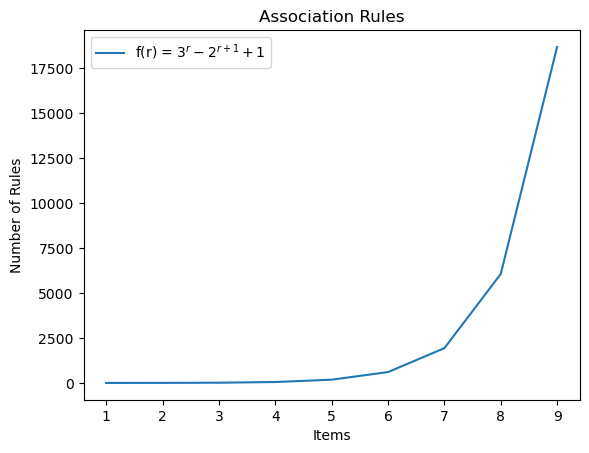

In [5]:
# Define the range of values for r
r_values = np.arange(1, 10)

# Calculate the corresponding values of f(r)
f_values = 3**r_values - 2**(r_values + 1) + 1

# Plot the function
plt.plot(r_values, f_values, label='f(r) = $3^r - 2^{r+1} + 1$')
plt.xlabel('Items')
plt.ylabel('Number of Rules')
plt.title('Association Rules')
plt.legend()
plt.grid(False)
plt.show()

In [9]:
# Metrics
# Support 
def support(itemset):
    count = sum(1 for transaction in transactions if itemset.issubset(transaction))
    return count / len(transactions)

# Confidence 
def confidence(antecedent, consequent):
    return support(antecedent.union(consequent)) / support(antecedent)

# Lift 
def lift(antecedent, consequent):
    return confidence(antecedent, consequent) / support(consequent)

### Sample Transactions
    Transaction 1: {apple, bread, cheese}
    Transaction 2: {bread, milk, eggs}
    Transaction 3: {bread, cheese, milk}
    Transaction 4: {cheese, milk}
    Transaction 5: {bread, cheese}

In [10]:
# Transactions
transactions = [
    {'apple', 'bread', 'cheese'},
    {'bread', 'milk', 'eggs'},
    {'bread', 'cheese', 'milk'},
    {'cheese','milk'},
    {'bread', 'cheese'}
]

### Apriori

#### Association Rules

    Minimum support threshold: 2
    Minimum confidence threshold: 0.5

    Step 1: Generate Candidate 1-itemsets
        Counting frequencies: apple: 1, bread: 4, cheese: 4, milk: 3, eggs: 1
        Frequent 1-itemsets: {bread, cheese, milk}

    Step 2: Generate Candidate 2-itemsets:
        Counting frequencies: (bread, cheese): 3, (bread, milk): 2, (cheese, milk): 2
        Frequent 2-itemsets: {(bread, cheese)}

    Step 3: Generate Candidate 3-itemsets :
        Counting frequencies:(bread, cheese, milk): 2
        Frequent 3-itemsets: {(bread, cheese, milk)}

    Step 4: Generate Association Rules:
        For each frequent itemset, generate association rules with all possible antecedents.
        Calculate the confidence of each association rule.
        Filter out rules with confidence below a minimum confidence threshold.

    Example:
        For frequent itemset {(bread, cheese, milk)}:
            {(bread, cheese) -> milk, (bread, milk) -> cheese, (cheese, milk) -> bread}
            Calculate confidence for each rule.
            Association rules: {(bread, cheese) -> milk}

In [11]:
# Association rule 1
#{apple, bread} -> {apple}
antecedent = {'bread', 'cheese'}
consequent = {'milk'}

# Compute support, confidence, and lift
support_value = support(antecedent.union(consequent))
confidence_value = confidence(antecedent, consequent)
lift_value = lift(antecedent, consequent)

print("Support:", support_value)
print("Confidence:", confidence_value)
print("Lift:", lift_value)

Support: 0.2
Confidence: 0.33333333333333337
Lift: 0.5555555555555557


In [12]:
# Association rule 2
#{apple, beer} -> {bread}
antecedent = {'milk', 'cheese'}
consequent = {'bread'}

# Compute support, confidence, and lift
support_value = support(antecedent.union(consequent))
confidence_value = confidence(antecedent, consequent)
lift_value = lift(antecedent, consequent)

print("Support:", support_value)
print("Confidence:", confidence_value)
print("Lift:", lift_value)

Support: 0.2
Confidence: 0.5
Lift: 0.625


### FP-Growth

    Step 0: Generate Ordered Itemsets:
        Count the frequency of each item in the dataset.
        Sort the items in descending order of frequency (and ascending order of lexicographic order for items with the same frequency).

    Example:
        Item frequencies: {'bread': 4, 'cheese': 4, 'milk': 3, 'apple': 1, 'eggs': 1}
        Ordered itemsets: ['bread', 'cheese', 'milk', 'apple', 'eggs']

    Step 1: Build the FP-Tree:
        Use the ordered itemsets to construct the FP-Tree efficiently.

    Step 2: Mine Frequent Itemsets from the FP-Tree:
        Starting from the bottom of the FP-Tree, mine frequent itemsets recursively.
        For each item, trace its conditional pattern base (prefix paths) and construct conditional FP-Trees.
        Mine frequent itemsets from each conditional FP-Tree.

    Step 3: Generate Association Rules:
        For each frequent itemset, generate association rules by splitting the itemset into antecedent and consequent.
        Calculate the confidence for each rule and filter out rules that don't meet the minimum confidence threshold.

Conditional Pattern Base for 'bread':

        {bread, milk}: count = 3
        {bread, cheese, milk}: count = 2
        {bread, cheese}: count = 1

Conditional Pattern Base for 'cheese':

        {cheese, milk}: count = 3
        {cheese, bread, milk}: count = 2

Conditional Pattern Base for 'milk':

        {milk}: count = 5

In [13]:
from collections import defaultdict

class TreeNode:
    def __init__(self, item, count):
        self.item = item
        self.count = count
        self.children = {}

def construct_fp_tree(transactions, ordered_itemsets):
    root = TreeNode(None, 0)
    header_table = defaultdict(list)

    for transaction in transactions:
        current_node = root
        for item in ordered_itemsets:
            if item in transaction:
                if item in current_node.children:
                    current_node.children[item].count += 1
                else:
                    new_node = TreeNode(item, 1)
                    current_node.children[item] = new_node
                    header_table[item].append(new_node)
                    header_table[item].sort(key=lambda x: x.count)  # Adjust ordering in the header table
                current_node = current_node.children[item]

    return root, header_table

# Example transactions and ordered itemsets
transactions = [
    {'bread', 'cheese', 'milk'},
    {'bread', 'milk', 'eggs'},
    {'bread', 'cheese', 'milk'},
    {'cheese', 'milk'},
    {'bread', 'cheese'}
]

ordered_itemsets = ['bread', 'cheese', 'milk']

# Construct the FP-Tree
fp_tree_root, header_table = construct_fp_tree(transactions, ordered_itemsets)

# Print the FP-Tree (for visualization purposes)
def print_fp_tree(node, level=0):
    if node is None:
        return
    print("  " * level + f"{node.item}: {node.count}")
    for child_item, child_node in node.children.items():
        print_fp_tree(child_node, level + 1)

print("FP-Tree:")
print_fp_tree(fp_tree_root)


FP-Tree:
None: 0
  bread: 4
    cheese: 3
      milk: 2
    milk: 1
  cheese: 1
    milk: 1
